
# Obter os dados


In [1]:
import pandas as pd

In [3]:
#df = pd.read_csv(datasets_path.joinpath('skills_dataset.txt'), sep=';', error_bad_lines=False)
df = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/rpgai/main/skills_dataset.txt', sep=';', error_bad_lines=False)
df.head()

b'Skipping line 9: expected 3 fields, saw 4\nSkipping line 197: expected 3 fields, saw 4\nSkipping line 201: expected 3 fields, saw 4\nSkipping line 202: expected 3 fields, saw 4\nSkipping line 248: expected 3 fields, saw 4\nSkipping line 269: expected 3 fields, saw 4\nSkipping line 299: expected 3 fields, saw 4\nSkipping line 346: expected 3 fields, saw 4\nSkipping line 355: expected 3 fields, saw 4\nSkipping line 356: expected 3 fields, saw 4\nSkipping line 399: expected 3 fields, saw 4\nSkipping line 401: expected 3 fields, saw 4\nSkipping line 402: expected 3 fields, saw 5\nSkipping line 403: expected 3 fields, saw 4\nSkipping line 405: expected 3 fields, saw 4\nSkipping line 422: expected 3 fields, saw 4\nSkipping line 423: expected 3 fields, saw 4\nSkipping line 449: expected 3 fields, saw 4\nSkipping line 454: expected 3 fields, saw 4\nSkipping line 479: expected 3 fields, saw 4\nSkipping line 488: expected 3 fields, saw 4\nSkipping line 491: expected 3 fields, saw 4\nSkipping l

skill                                      check_line  \
0      Nature  MATT: Make a nature check for me, if you don't   
1      Nature                  TALIESIN: Nature check, oh no.   
2      Nature        TALIESIN: My nature check weirdly sucks.   
3  Persuasion                  MATT: Make a persuasion check.   
4  Perception   MATT: Sure. Make a perception check at first.   

                                       backward_text  
0  She looks back from the inside and goes-- He t...  
1  Error 404! The lip quiver. (laughter) She look...  
2  (laughter) She looks back and goes, "There's a...  
3  I'll help Beau! Yeah, I know, it's funny how m...  
4  cool! That's old business. We've seen that one...

In [116]:
df.sample().values[0]

array(['Stealth', 'the stealth check actually. Because I said when',
       "and general atmosphere. Beau, you're feeling a little rough. Ah? What? You get this sweating a little bit and this soreness in your body and this general body pain, kind of a dull pain throughout. You've got mono. Nope. I'm great. Just kind of (sighs)... you're not quite sure why it's come over you. Pressing on, Jamedi leads you for about another hour and a half, two hours through the jungle before putting his hand up once more to stop you all. Oh we didn't make"],
      dtype=object)

In [117]:
# Remove a percepção porque tinha mais de 1300
#df = df[df.skill != 'Perception']

In [118]:
#Apenas com dados do critical role
df.groupby('skill').count()

check_line  backward_text
skill                                     
Acrobatics              230            230
Animal Handling          26             26
Arcana                  147            147
Athletics               362            362
Deception               219            219
History                  88             88
Insight                 432            432
Intimidation            109            109
Investigation           620            620
Medicine                 90             90
Nature                  174            174
Perception             1383           1383
Performance              43             43
Persuasion              330            330
Religion                103            103
Sleight of Hand          55             55
Stealth                 591            590
Survival                 96             96

In [4]:
import plotly.graph_objects as go
grafico_label = go.Figure()
grafico_label.add_trace(go.Histogram(histfunc="count",  x=df['skill']))
grafico_label

ModuleNotFoundError: No module named 'plotly'

## Obtendo as ações da planilha

In [5]:
df_actions = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/rpgai/main/SkillDB-csv.csv', error_bad_lines=False)
df_actions.head()

skill  check_line                                      backward_text
0  Acrobatics         NaN        Freeing yourself from grapples and the like
1  Acrobatics         NaN  Squeezing through tight spaces without losing ...
2  Acrobatics         NaN  Balancing on thin/fragile surfaces without fal...
3  Acrobatics         NaN                  Landing on your feet after a fall
4  Acrobatics         NaN  Ignoring falling damage, such as falling from ...

In [6]:
df_tk_skills = pd.read_csv('drive/My Drive/ia/rpg/datasets/tk_skills2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/ia/rpg/datasets/tk_skills2.csv'

In [122]:
df_tk_skills.head()

skill                                      backward_text original_name
0      History  > nodded accepting the parcel by ’s hands, in ...          Lore
1  Performance  > nodded accepting the parcel by ’s hands, in ...          Song
2       Arcana  >"Aye, give me but a moment to study this piec...         Craft
3     Medicine  >(Healing roll: to see if he can remember anyt...       Healing
4     Survival  >(OOC: Travel roll. Do we need even to test co...        Travel

In [123]:
df_tk_skills.sample().values[0]

array(['Performance', ">(OOC: Song,I'll spend a hope point if needed) ",
       'Song'], dtype=object)

In [124]:
df_tk_skills2.shape

(1031, 4)

In [125]:
skills = [
'Deception',
'Intimidation',
'Performance',
'Persuasion',
'Acrobatics',
'Sleight of Hand',
'Stealth',
'Arcana',
'History',
'Investigation',
'Nature',
'Religion',
'Athletics',
'Animal Handling',
'Insight',
'Medicine',
'Perception',
'Survival'
]

df_tk_skills2 = df_tk_skills[df_tk_skills['skill'].isin(skills)].copy()

In [126]:
df.shape

(5098, 3)

In [8]:
# Seleciona origem do treinamento
df['origem'] = 'CR'
df_actions['origem'] = 'RR'
#df_tk_skills2['origem'] = 'TK'

#list_df = [df_actions, df_tk_skills2]
#df = df.append(list_df, ignore_index=True)
df.append(df_actions, ignore_index=True)

skill                                      check_line  \
0         Nature  MATT: Make a nature check for me, if you don't   
1         Nature                  TALIESIN: Nature check, oh no.   
2         Nature        TALIESIN: My nature check weirdly sucks.   
3     Persuasion                  MATT: Make a persuasion check.   
4     Perception   MATT: Sure. Make a perception check at first.   
...          ...                                             ...   
5312   Athletics                                             NaN   
5313   Athletics                                             NaN   
5314   Athletics                                             NaN   
5315   Athletics                                             NaN   
5316   Athletics                                             NaN   

                                          backward_text origem  
0     She looks back from the inside and goes-- He t...     CR  
1     Error 404! The lip quiver. (laughter) She look...     CR  
2     (laughter) She looks back and goes, "There's a...     CR  
3     I'll help Beau! Yeah, I know, it's funny how m...     CR  
4     cool! That's old business. We've seen that one...     CR  
...                                                 ...    ...  
5312                                          Disarming     RR  
5313                                               Trip     RR  
5314  You attempt to climb a sheer or slippery cliff...     RR  
5315  You try to jump an unusually long distance or ...     RR  
5316  You struggle to swim or stay afloat in treache...     RR  

[5317 rows x 4 columns]

In [128]:
df.shape

(6348, 5)

In [129]:
df.head()

skill  ... original_name
0      Nature  ...           NaN
1      Nature  ...           NaN
2      Nature  ...           NaN
3  Persuasion  ...           NaN
4  Perception  ...           NaN

[5 rows x 5 columns]

In [130]:
df.groupby('skill').count()

check_line  backward_text  origem  original_name
skill                                                            
Acrobatics              230            271     271             28
Animal Handling          26             54      54             10
Arcana                  147            190     190             29
Athletics               362            447     447             49
Deception               219            240     240              8
History                  88            152     152             53
Insight                 432            523     523             79
Intimidation            109            165     165             49
Investigation           620            714     714             85
Medicine                 90            120     120             17
Nature                  174            273     273             90
Perception             1383           1619    1619            226
Performance              43             74      74             23
Persuasion              330            466     466            125
Religion                103            111     111              1
Sleight of Hand          55             73      73              8
Stealth                 591            663     664             63
Survival                 96            192     192             75

# Limpar os dados

In [2]:
!pip install -U pip setuptools wheel
!pip install -U spacy

  Using cached pip-20.3.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\ami_a\\AppData\\Local\\Temp\\pip-uninstall-om9558wi\\pip.exe'
Consider using the `--user` option or check the permissions.



In [3]:
import spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [4]:
#nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
spacy.prefer_gpu()

In [13]:
# Sem essa conversão, acontece um erro na hora de remover as stop words
df['backward_text'] = df['backward_text'].astype(str)
df['backward_text'] = df['backward_text'].str.lower()

In [25]:
# remove palavras muito comuns
nlp.vocab["going"].is_stop = True
nlp.vocab["right"].is_stop = True
nlp.vocab["okay"].is_stop = True
nlp.vocab["yeah"].is_stop = True
nlp.vocab["want"].is_stop = True
nlp.vocab["try"].is_stop = True
nlp.vocab["gonna"].is_stop = True
nlp.vocab["good"].is_stop = True
nlp.vocab["yes"].is_stop = True
nlp.vocab["no"].is_stop = True
nlp.vocab["oh"].is_stop = True
nlp.vocab["look"].is_stop = True
nlp.vocab["know"].is_stop = True
nlp.vocab["way"].is_stop = True
nlp.vocab["looks"].is_stop = True
nlp.vocab["guy"].is_stop = True
nlp.vocab["little"].is_stop = True
nlp.vocab["check"].is_stop = True
nlp.vocab["thin"].is_stop = True
nlp.vocab["thing"].is_stop = True
nlp.vocab["guys"].is_stop = True
nlp.vocab["come"].is_stop = True
nlp.vocab["roll"].is_stop = True
nlp.vocab["let"].is_stop = True
nlp.vocab["time"].is_stop = True
nlp.vocab["got"].is_stop = True
nlp.vocab["goes"].is_stop = True
nlp.vocab["maybe"].is_stop = True

# remove nome dos players e personagens
nlp.vocab["jester"].is_stop = True
nlp.vocab["caleb"].is_stop = True
nlp.vocab["nott"].is_stop = True
nlp.vocab["fjord"].is_stop = True
nlp.vocab["yasha"].is_stop = True
nlp.vocab["beau"].is_stop = True
nlp.vocab["matt"].is_stop = True
nlp.vocab["sam"].is_stop = True
nlp.vocab["travis"].is_stop = True
nlp.vocab["marisha"].is_stop = True
nlp.vocab["ashley"].is_stop = True
nlp.vocab["laura"].is_stop = True
nlp.vocab["liam"].is_stop = True
nlp.vocab["professor"].is_stop = True
nlp.vocab["thaddeus"].is_stop = True
nlp.vocab["taliesin"].is_stop = True
nlp.vocab["mollymauk"].is_stop = True
nlp.vocab["grog"].is_stop = True
nlp.vocab["pike"].is_stop = True

def spacy_clean(str_text):
  doc = nlp(str_text)
  #Tokenize. cria um array com o texto dos tokens que não são Stop Words, pontuação ou números
  tokens = [token.text for token in doc if not token.is_stop | token.is_punct| token.text.isdigit()]
  tokens = [token.text for token in doc if token.pos_ == 'VERB' or token.pos_ == 'NOUN']
  return ' '.join(tokens)

#Removendo as stop words, pontuação e números. Depois concatenando tudo junto
#for i,backward_text in df.iterrows():
  
  #df.at[i,'backward_text'] = ' '.join(backward_text['backward_text'])

df['backward_text_2'] = df['backward_text'].apply(spacy_clean)

In [202]:
df_6546564 = pd.DataFrame([['she looks back from the inside and goes'], 
                           ['she looks back from the inside and goes']], columns=['backward_text'])

df_6546564['backward_text_2'] = df_6546564['backward_text'].apply(spacy_clean)
df_6546564

backward_text    backward_text_2
0  she looks back from the inside and goes  looks inside goes
1  she looks back from the inside and goes  looks inside goes

In [27]:
print(spacy_clean('she looks back from the inside and goes'))

looks inside goes


In [28]:
df.head()

skill                                      check_line  \
0      Nature  MATT: Make a nature check for me, if you don't   
1      Nature                  TALIESIN: Nature check, oh no.   
2      Nature        TALIESIN: My nature check weirdly sucks.   
3  Persuasion                  MATT: Make a persuasion check.   
4  Perception   MATT: Sure. Make a perception check at first.   

                                       backward_text origem  \
0  she looks back from the inside and goes-- he t...     CR   
1  error 404! the lip quiver. (laughter) she look...     CR   
2  (laughter) she looks back and goes, "there's a...     CR   
3  i'll help beau! yeah, i know, it's funny how m...     CR   
4  cool! that's old business. we've seen that one...     CR   

                                     backward_text_2  
0  looks inside tried error quiver laughter looks...  
1  error quiver laughter looks goes cluster seawe...  
2  laughter looks goes cluster seaweed steps ente...  
3  'll help know nature check looking seaweed int...  
4  business seen guys take rest can use hit dice ...

In [29]:
import re

def clean_text(text):
  
  text_return = re.sub(r"[^a-z]", ' ', text) # keep only words
  text_return = re.sub(r"\b[a-z]{1,2}\b", ' ', text_return) # remove <2 characters
  return text_return

df['backward_text_2'] = df['backward_text_2'].apply(clean_text)


In [206]:
df

skill  ...                                    backward_text_2
0         Nature  ...  looks inside goes tried error lip quiver laugh...
1         Nature  ...  lip quiver laughter looks goes cluster seaweed...
2         Nature  ...  laughter looks goes cluster seaweed steps does...
3     Persuasion  ...  help know nature check looking seaweed variety...
4     Perception  ...  business seen guys take rest can use hit dice ...
...          ...  ...                                                ...
6343  Acrobatics  ...  catching breath impact railing ghost will reac...
6344  Persuasion  ...  tisk one gets fun ghost mumbles huff see ship ...
6345  Perception  ...  tisk one gets fun ghost mumbles huff see ship ...
6346  Perception  ...  style text align center gasps boulder comes fl...
6347     Stealth  ...      holds hand dohlor goes open door warpick hand

[6348 rows x 6 columns]

In [30]:
# Amostra estratificada com reposição >> Risco de viciar o modelo
df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300, replace=True).reset_index(drop=True)

# Descomentar quando a massa de dados tiver mais que 300 exemplos de cada skill
#df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300).reset_index(drop=True)

In [31]:
df.sample().values[0]

array(['Acrobatics', 'stop you. Make two acrobatics checks.',
       "01:41:23.878 --> 01:41:25.163 i'm never going back! 01:41:25.163 --> 01:41:27.022 because when it gets to nott's turn-- 01:41:27.022 --> 01:41:29.117 yeah, i'm going to bolt. 01:41:29.117 --> 01:41:36.149 okay. if that's the case, there are four guards now. no, because now two of them have 01:41:36.149 --> 01:41:39.514 changed direction to go towards you and help subdue you guys. there's two after you now. 01:41:39.514 --> 01:41:43.271 they're both going to attempt to grapple you and",
       'CR',
       'going gets going bolt case guards changed direction   help subdue guys              going attempt grapple'],
      dtype=object)

In [32]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train: 75% dos textos prévios ao teste
X_test: 25% dos labels da skills
y_train: 75% dos labels das skills
y_test: 25% dos labels das skills

In [33]:
# Split dos dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(df_estrat['backward_text_2'], df_estrat['skill'], random_state = 0)

In [211]:
#Adicionando as ações da planilha a base de treinamento
#X_train = X_train.append(df_actions['backward_text'])
#y_train = y_train.append(df_actions['skill'])

In [34]:
# Bag of words
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

X_train_counts é uma matriz que representa quantas vezes cada uma das palavras apareceram no corpus, onde a quantidade de linhas do corpus é a quantidade de linhas da matriz e a quantidade de colunas é o tamanho do bag of words, e cada celula é a quantidade de vezes que a palavra que está na mesma posição do bag of words apareceu na linha do corpus em questão

In [35]:
#ta muito zuado as features, não devia ter números
print(count_vect.get_feature_names())

unechild', 'runekeeper', 'runes', 'rung', 'rungs', 'running', 'runoff', 'runs', 'ruptured', 'ruse', 'rush', 'rushes', 'rushing', 'rusted', 'rustling', 'ruzza', 'sack', 'sacks', 'sacrifice', 'saddle', 'saddles', 'safe', 'safety', 'sage', 'said', 'sail', 'sailed', 'sailing', 'sails', 'sake', 'sale', 'sales', 'salesman', 'salt', 'salted', 'saltiness', 'salvage', 'salvation', 'sample', 'sanctuary', 'sand', 'sandals', 'sandkheg', 'sandwich', 'sang', 'sap', 'sapphire', 'sapphires', 'sarenrae', 'sat', 'satchel', 'satchels', 'satisfy', 'savage', 'savalierwood', 'save', 'saved', 'saves', 'saving', 'savings', 'saw', 'say', 'saying', 'says', 'scaffolding', 'scale', 'scaled', 'scales', 'scaling', 'scam', 'scan', 'scanlan', 'scanning', 'scapegoat', 'scar', 'scarbearers', 'scare', 'scarecrow', 'scared', 'scares', 'scarf', 'scarfing', 'scarfs', 'scarred', 'scarring', 'scars', 'scatter', 'scattered', 'scattering', 'scatters', 'scavenge', 'scenario', 'scene', 'scenery', 'scent', 'schmear', 'schmidle', 

In [36]:
# Transformando o bag of words em um tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [37]:
# Treinando o modelo
# pra treinar o modelo usa os 75% dos textos e dos labels, pra depois ele predizer
#clf = MultinomialNB().fit(X_train_tfidf, y_train)
%time clf = LinearSVC().fit(X_train_tfidf, y_train)

Wall time: 178 ms


In [38]:
#aqui ele cria um array do que foi predito dos 25% de teste de treinamento que não foi usado pra treinar o modelo
y_pred = clf.predict(count_vect.transform(X_test))

In [39]:
print(y_pred)

['Intimidation' 'Religion' 'Medicine' ... 'Animal Handling' 'History'
 'Survival']


In [40]:
from sklearn import metrics
#Adicionando as ações da planilha a acuracia foi de 0.45254901960784316 para 0.47058823529411764
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8007407407407408


In [41]:
#aqui ele pega a precisão de cara feature, porque ele compara a feature o acerto de cada feature ordenada do menor para o maior (em caso de números), ou ordem alfabética
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

     Acrobatics       0.81      0.84      0.82        74
Animal Handling       0.98      1.00      0.99        86
         Arcana       0.73      0.95      0.82        73
      Athletics       0.68      0.81      0.74        68
      Deception       0.72      0.72      0.72        64
        History       0.91      0.87      0.89        79
        Insight       0.81      0.57      0.67        75
   Intimidation       0.75      0.94      0.83        82
  Investigation       0.56      0.54      0.55        69
       Medicine       0.88      0.99      0.93        68
         Nature       0.89      0.81      0.85        73
     Perception       0.62      0.38      0.47        85
    Performance       0.96      1.00      0.98        70
     Persuasion       0.67      0.56      0.61        72
       Religion       0.88      0.96      0.92        79
Sleight of Hand       0.88      0.97      0.92        80
        Stealth       0.81    

In [220]:
acrobatics = 'seeing his princess wrap a black cord he says, oh this is gonna be fun, much appreciated.  "Metal, second verse same as the first " as he tumbles behind the next living spell '
athletics = 'ASHLEY: Right, okay. MATT: That finishes its turn. Beau, you are up. You watch Yasha slam on the ground, unconscious next to you, the blade clattering to the ground and coming to rest. The creature lifts up (wheezing) and vanishes into the stone above you. MARISHA: I can not get a reaction from it, as it goes? MATT: It was not close enough to you, unfortunately. MARISHA: Fuck. Im going to run over to this bookcase and put my staff behind it to see if I can knock it over. MATT: You get the staff on the fulcrum.'
survival = 'Thanks to Halbarad s advice and map, Ren felt prepared for the route they would take on the journey.'
insight = 'Will pay keen attention to read into any suggestion of how the news is presented to Thorin  and how welcome it is to him. Zaken has a sneaky feeling that Thorin has something lingering in his mind  from the meeting they had yesterday anyway.'
religion = 'i try recognize the holy symbol'
acrobatics2 = 'you tumble the strike'

In [275]:
print(spacy_clean(acrobatics))

seeing princess wrap cord says gon appreciated Metal verse tumbles living spell


In [279]:
# ao invés de dar o predict, retornar os 3 maiores skills com probabilidade prevista
print(clf.predict(count_vect.transform([spacy_clean(acrobatics2.lower())])))

['Deception']


# Matriz de confusão

In [42]:
import numpy as np
skill_arr = np.array(df['skill'].unique())
skill_arr = np.sort(skill_arr)

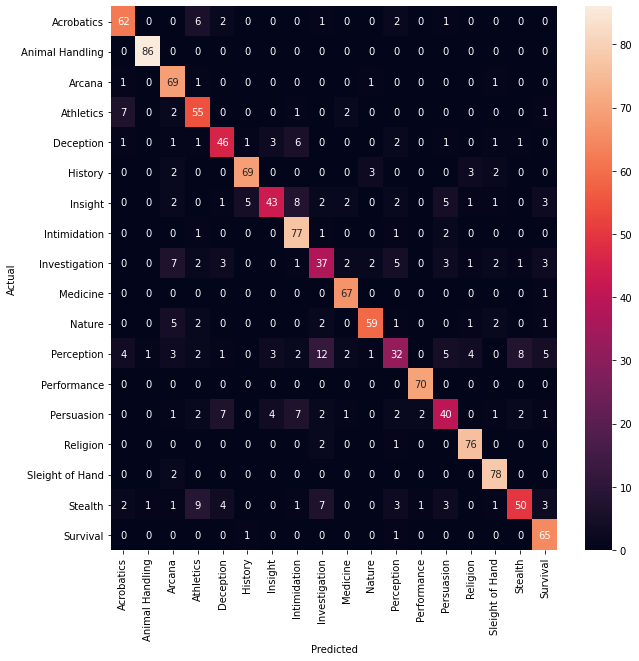

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=skill_arr, yticklabels=skill_arr)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [224]:
y_test.value_counts()

Stealth            86
Animal Handling    86
Perception         85
Intimidation       82
Sleight of Hand    80
History            79
Religion           79
Insight            75
Acrobatics         74
Arcana             73
Nature             73
Persuasion         72
Performance        70
Investigation      69
Medicine           68
Athletics          68
Survival           67
Deception          64
Name: skill, dtype: int64

# Wordclouds + bag of words

In [44]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud

In [46]:
# Fazer o wordcloud com base no df_estrat ao invés de df

def print_wordcloud(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  document = ' '.join(skills_backward['backward_text_2'])

  wordcloud = WordCloud(background_color="white").generate(document)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  print(skill_name)

In [47]:
def BOW(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  backward_train, backward_test, skill_train, skill_test = train_test_split(skills_backward['backward_text_2'], skills_backward['skill'], random_state = 0)
  
  count_vect_skill = CountVectorizer()
  count_vect_skill.fit_transform(backward_train)
  print(count_vect_skill.get_feature_names())

Deception


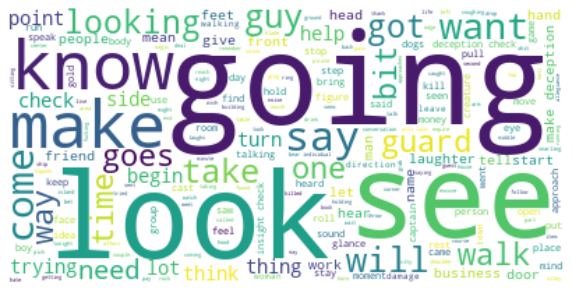

In [48]:
print_wordcloud('Deception')

In [230]:
BOW('Deception')

['able', 'about', 'above', 'access', 'accidentally', 'acknowledge', 'acquire', 'acquired', 'across', 'act', 'action', 'actual', 'actually', 'addicted', 'adhesive', 'administrating', 'administrator', 'admit', 'adopt', 'adopted', 'adorns', 'advantage', 'advice', 'advisor', 'affordable', 'aflame', 'afraid', 'after', 'again', 'against', 'age', 'aggressive', 'ago', 'agree', 'agreed', 'agrees', 'ahead', 'ahem', 'aid', 'air', 'akin', 'alchemist', 'alcoholic', 'alcoves', 'ale', 'alert', 'alfield', 'alive', 'all', 'allegiance', 'alley', 'alleys', 'allow', 'almost', 'alms', 'alone', 'along', 'already', 'also', 'alternative', 'always', 'amateurs', 'amazing', 'amazon', 'amber', 'amongst', 'amphitheater', 'ancient', 'and', 'angels', 'angry', 'angular', 'animals', 'ank', 'another', 'anselm', 'answer', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anyting', 'anyway', 'anyways', 'anywhere', 'apocalypse', 'apologies', 'apologize', 'apparently', 'appear', 'appearance', 'appears', 'appreciated', 'a

Intimidation


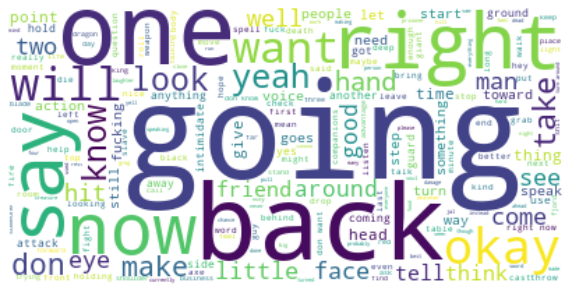

In [231]:
print_wordcloud('Intimidation')

In [232]:
BOW('Intimidation')

['abdomen', 'ability', 'able', 'about', 'above', 'absolutely', 'accept', 'access', 'accomplish', 'accord', 'accordance', 'across', 'act', 'acting', 'action', 'actions', 'actual', 'actually', 'add', 'added', 'adding', 'admit', 'admonishment', 'advantage', 'adversaries', 'advice', 'after', 'again', 'against', 'aggresive', 'ago', 'agree', 'agreement', 'ahead', 'aid', 'ain', 'air', 'alarm', 'alertness', 'algar', 'alive', 'all', 'alleyway', 'allies', 'allow', 'allows', 'almost', 'alone', 'along', 'aloud', 'already', 'also', 'always', 'amd', 'amdir', 'amount', 'and', 'anger', 'angrily', 'angry', 'animal', 'ankle', 'anna', 'another', 'answer', 'answering', 'answers', 'anti', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apology', 'appear', 'appears', 'applaud', 'apple', 'appreciate', 'appreciation', 'apprehending', 'approach', 'appropriate', 'arby', 'arc', 'archer', 'are', 'area', 'areas', 'arm', 'armor', 'armour', 'armours', 'arms', 'around', 'arranged', 'arrest', '

Performance


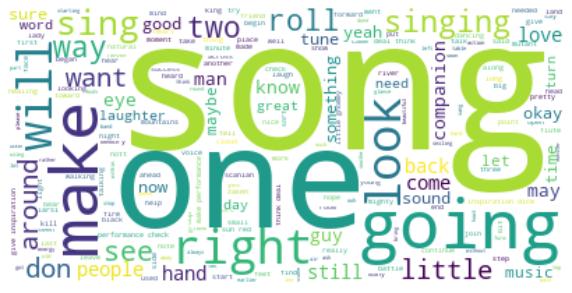

In [233]:
print_wordcloud('Performance')

In [234]:
BOW('Performance')

['about', 'above', 'abs', 'accompanied', 'acquaintance', 'acrobatics', 'across', 'action', 'actual', 'add', 'added', 'addition', 'adventure', 'adventuring', 'after', 'again', 'against', 'ago', 'agreed', 'agrees', 'ahead', 'aimed', 'air', 'alas', 'all', 'almost', 'alone', 'aloneher', 'along', 'aloud', 'already', 'alright', 'also', 'altar', 'although', 'always', 'amount', 'and', 'anduin', 'ang', 'animals', 'another', 'answer', 'any', 'anyone', 'anything', 'anywhere', 'applause', 'approach', 'approached', 'approval', 'approve', 'approving', 'are', 'areas', 'aren', 'arm', 'armor', 'armourthe', 'arms', 'around', 'arrested', 'arrow', 'artagan', 'artist', 'aside', 'ask', 'asked', 'asks', 'asleep', 'assume', 'asunderthe', 'atmosphere', 'attempt', 'attention', 'audio', 'authorities', 'autobiography', 'autopilot', 'avantika', 'avoid', 'away', 'awkward', 'axe', 'back', 'backfire', 'badly', 'baldor', 'ballad', 'band', 'bandit', 'bands', 'banog', 'bard', 'bare', 'barkeep', 'barns', 'based', 'basic'

Persuasion


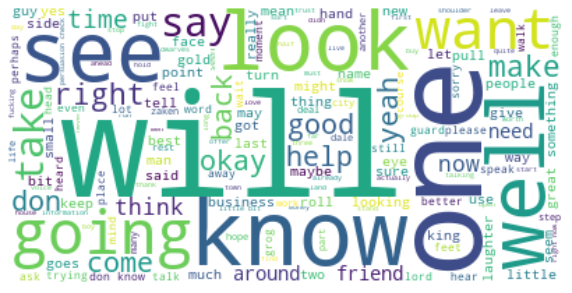

In [235]:
print_wordcloud('Persuasion')

In [236]:
BOW('Persuasion')

['abandoned', 'abandoning', 'abilities', 'ability', 'able', 'about', 'above', 'abraham', 'absolute', 'absolutely', 'absolve', 'abuse', 'accent', 'accepted', 'access', 'accident', 'accompany', 'accused', 'accustomed', 'achieve', 'acquaintance', 'acquire', 'acres', 'across', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'acts', 'actual', 'actually', 'adalfinn', 'adam', 'add', 'added', 'adding', 'address', 'addressing', 'adds', 'adjoining', 'adjusts', 'adorably', 'adorned', 'advance', 'advances', 'advantage', 'adventure', 'adventurer', 'adventurers', 'adventures', 'advice', 'advisor', 'advisors', 'aerial', 'affairs', 'affect', 'affected', 'affecting', 'affiliated', 'affiliations', 'affluent', 'aflame', 'afraid', 'after', 'again', 'against', 'agents', 'ago', 'agree', 'agreeable', 'agreed', 'agreement', 'agrees', 'ahead', 'ahem', 'ahlia', 'aid', 'aim', 'aiming', 'aims', 'ain', 'air', 'airship', 'alchemy', 'alcoholics', 'ale', 'algar', 'alice', 'aligned', 'alive', 'all', 'all

Acrobatics


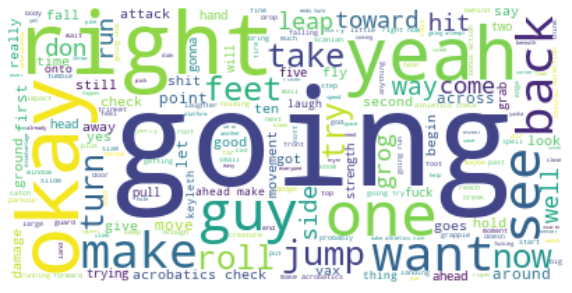

In [237]:
print_wordcloud('Acrobatics')

In [238]:
BOW('Acrobatics')

['ability', 'able', 'about', 'above', 'absolutely', 'achilles', 'acro', 'acrobatics', 'across', 'action', 'actions', 'active', 'actual', 'actually', 'add', 'addition', 'additional', 'adequate', 'adhering', 'adjacent', 'advantage', 'aerial', 'aeric', 'affect', 'affected', 'after', 'aftertaste', 'again', 'against', 'aggression', 'aggressive', 'ahead', 'aid', 'aims', 'air', 'alarm', 'alcove', 'alive', 'all', 'alleviate', 'alley', 'alleyway', 'allies', 'allow', 'alluring', 'almost', 'alone', 'along', 'alongside', 'alphabetical', 'already', 'also', 'always', 'amazing', 'amongst', 'and', 'angel', 'angered', 'angry', 'animal', 'another', 'answer', 'answered', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'appear', 'approach', 'approaching', 'arc', 'arcane', 'archer', 'archers', 'arcs', 'are', 'area', 'aren', 'arguably', 'arm', 'armor', 'arms', 'around', 'arrow', 'ascending', 'ashari', 'ask', 'asking', 'ass', 'asses', 'asshole', 'assist', 'assisting', 'athle

Sleight of Hand


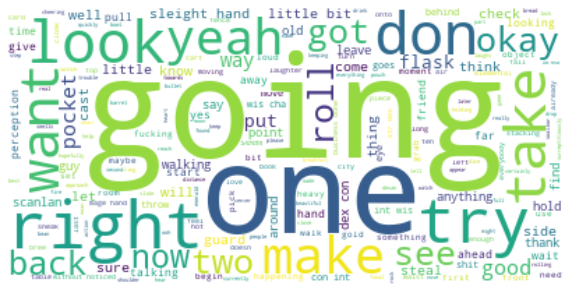

In [239]:
print_wordcloud('Sleight of Hand')

In [240]:
BOW('Sleight of Hand')

['ability', 'about', 'above', 'accessible', 'accompany', 'acid', 'across', 'action', 'actual', 'actually', 'add', 'adhering', 'advantage', 'adventures', 'affection', 'after', 'again', 'ago', 'ahead', 'air', 'all', 'allies', 'almost', 'already', 'also', 'amongst', 'and', 'angeles', 'ante', 'anvil', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'appear', 'appears', 'approach', 'archer', 'are', 'area', 'aren', 'arena', 'around', 'arrivals', 'arrow', 'arrows', 'artisans', 'asleep', 'aspect', 'ass', 'assholes', 'assume', 'attach', 'attached', 'attack', 'attempt', 'attention', 'attuning', 'away', 'baby', 'back', 'bad', 'bag', 'bald', 'ball', 'balls', 'bangy', 'barkeep', 'barrel', 'base', 'based', 'baubles', 'bean', 'bearings', 'beau', 'beautiful', 'because', 'bed', 'bedtime', 'been', 'before', 'begging', 'begin', 'begins', 'behind', 'being', 'bell', 'belongings', 'belt', 'beneath', 'best', 'between', 'big', 'bigby', 'bit', 'bitch', 'black', 'bleeding', 'blend', 'bonus', 'boob', 'book', '

Stealth


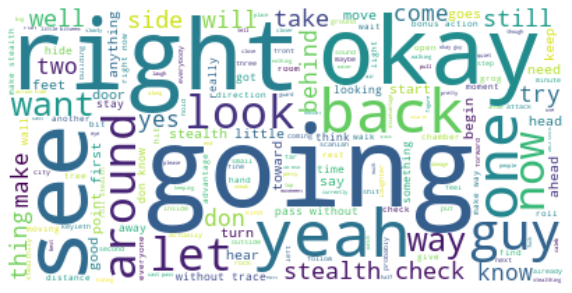

In [241]:
print_wordcloud('Stealth')

In [242]:
BOW('Stealth')

['abandoned', 'abc', 'abdomen', 'ability', 'able', 'abode', 'abominations', 'aboriginals', 'about', 'above', 'academy', 'access', 'accident', 'achieves', 'acid', 'acrobatics', 'across', 'act', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'adams', 'add', 'added', 'adding', 'addition', 'additional', 'additions', 'adds', 'adhered', 'adjacent', 'admires', 'admonishment', 'adopted', 'advanced', 'advantage', 'advantageous', 'adventure', 'advice', 'advised', 'aesthetic', 'affix', 'affixed', 'after', 'afternoon', 'afterwards', 'again', 'against', 'age', 'agents', 'ages', 'aggressive', 'ago', 'agree', 'agreed', 'ahead', 'ahlia', 'aid', 'aiding', 'air', 'alarm', 'alarms', 'alchemist', 'ale', 'alive', 'all', 'alley', 'alleyway', 'allies', 'allison', 'allow', 'allowed', 'allows', 'allura', 'almost', 'aloft', 'alone', 'along', 'already', 'also', 'alter', 'aluminum', 'always', 'amazing', 'ambush', 'amdir', 'amiss', 'amongst', 'amorphous', 'amount', 'amphal

Arcana


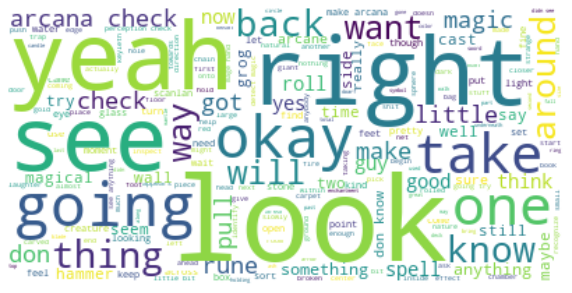

In [243]:
print_wordcloud('Arcana')

In [244]:
BOW('Arcana')

['aback', 'abilities', 'ability', 'able', 'about', 'above', 'absolutely', 'abyss', 'accept', 'accessories', 'acid', 'across', 'action', 'activate', 'activity', 'acts', 'actual', 'actually', 'add', 'adds', 'adjacent', 'admire', 'adorns', 'advantage', 'affect', 'affixed', 'after', 'afterthought', 'again', 'against', 'aghast', 'ago', 'agree', 'agrees', 'ahead', 'ahem', 'aid', 'aim', 'air', 'airport', 'ale', 'algar', 'alignment', 'alive', 'all', 'alley', 'allowing', 'almost', 'aloft', 'alone', 'along', 'already', 'also', 'always', 'amazing', 'amongst', 'amount', 'ample', 'and', 'angel', 'angle', 'animals', 'anna', 'another', 'anticipated', 'anvil', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apparently', 'appearing', 'appears', 'approach', 'approval', 'approved', 'arcana', 'arcane', 'archer', 'archet', 'architecture', 'are', 'area', 'aren', 'arm', 'armed', 'armor', 'arms', 'aroma', 'around', 'arrow', 'arrows', 'art', 'artificer', 'ascertain', 'ash', '

History


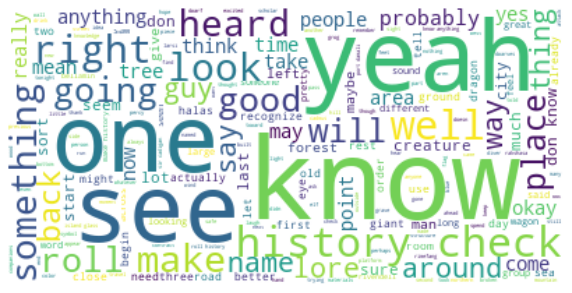

In [245]:
print_wordcloud('History')

In [246]:
BOW('History')

['abilities', 'able', 'about', 'above', 'accepting', 'access', 'aching', 'acknowledge', 'across', 'actually', 'adama', 'add', 'added', 'adv', 'advancement', 'advantage', 'advice', 'afar', 'affairs', 'after', 'afterward', 'again', 'against', 'ago', 'ahead', 'ahh', 'air', 'airship', 'alchemist', 'alive', 'all', 'allies', 'allocate', 'allowed', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amarla', 'amazing', 'amdir', 'amongst', 'amount', 'anchor', 'ancient', 'and', 'anduin', 'angular', 'annoyed', 'another', 'answer', 'answers', 'any', 'anybody', 'anyone', 'anything', 'anyway', 'apologies', 'apparently', 'appear', 'appearance', 'appreciation', 'approaches', 'approved', 'arcana', 'arcane', 'archibald', 'are', 'area', 'areas', 'aren', 'argue', 'armed', 'armor', 'army', 'arnor', 'around', 'arranged', 'arrival', 'arrive', 'arrives', 'arriving', 'ashari', 'ask', 'asked', 'asking', 'aspects', 'assault', 'assemble', 'assists', 'associated', 'assume', 'assuming',

Investigation


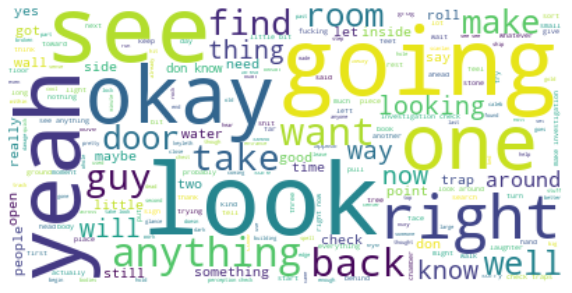

In [247]:
print_wordcloud('Investigation')

In [248]:
BOW('Investigation')

['abandoned', 'abi', 'abilities', 'ability', 'abjuration', 'able', 'about', 'above', 'absent', 'absolutely', 'abysmal', 'abyssal', 'accent', 'access', 'accompany', 'accompanying', 'accomplished', 'accordioned', 'accounts', 'accumulation', 'acidic', 'acknowledging', 'acquires', 'across', 'act', 'acting', 'action', 'actively', 'actual', 'actually', 'adam', 'adamant', 'add', 'added', 'adding', 'additional', 'adds', 'administer', 'adorable', 'adornments', 'adrift', 'adult', 'advantage', 'advantageous', 'adventure', 'adventurer', 'adventures', 'advice', 'advocate', 'aether', 'afar', 'affairs', 'affect', 'affected', 'affixed', 'afford', 'affordable', 'afraid', 'after', 'afterthought', 'again', 'against', 'agape', 'age', 'aged', 'agents', 'aggressive', 'agility', 'ago', 'agree', 'agreement', 'ahead', 'aid', 'aiding', 'aim', 'air', 'ajar', 'akin', 'alarm', 'alchemical', 'alcove', 'alcoves', 'ale', 'algae', 'alive', 'all', 'allegiance', 'alley', 'alleyway', 'allhammer', 'allow', 'allowance', 'a

Nature


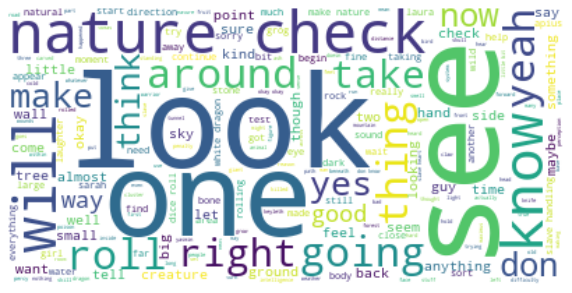

In [249]:
print_wordcloud('Nature')

In [250]:
BOW('Nature')

['able', 'abnormal', 'abnormality', 'about', 'above', 'abrasive', 'abstract', 'abused', 'accessible', 'accurate', 'achieve', 'acid', 'acidic', 'acknowledged', 'acrobatics', 'across', 'action', 'active', 'activity', 'actual', 'actually', 'add', 'added', 'adjust', 'advance', 'advantage', 'adventure', 'affectation', 'afraid', 'after', 'afternoon', 'again', 'against', 'agility', 'ago', 'ahead', 'ahlia', 'ahn', 'air', 'alcove', 'alert', 'alike', 'alive', 'all', 'allowed', 'ally', 'almost', 'alone', 'along', 'already', 'also', 'alternate', 'although', 'always', 'amazement', 'amicable', 'amount', 'ancestors', 'and', 'animal', 'animals', 'animus', 'ankle', 'ankles', 'annoyed', 'another', 'answers', 'antagonistic', 'anthill', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'apart', 'ape', 'apius', 'aplenty', 'appear', 'appearance', 'appears', 'applied', 'applies', 'appreciate', 'approach', 'appropriate', 'approximately', 'arcana', 'arcane', 'arch', 'archer', 'archery', 'are', 'area', 'arms', 

Religion


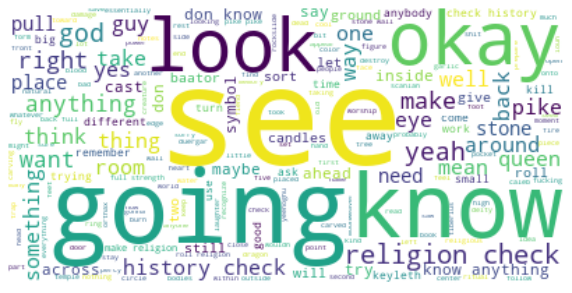

In [251]:
print_wordcloud('Religion')

In [252]:
BOW('Religion')

['able', 'about', 'above', 'abyss', 'according', 'acid', 'acidic', 'acolytes', 'across', 'action', 'actual', 'actually', 'advantage', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'ale', 'all', 'allegiance', 'alleyway', 'allhammer', 'allow', 'ally', 'almost', 'alone', 'along', 'alphabet', 'already', 'also', 'altar', 'alter', 'although', 'always', 'ambushed', 'ancient', 'and', 'animal', 'animalistically', 'anime', 'another', 'any', 'anybody', 'anyone', 'anything', 'apologize', 'apparently', 'appear', 'appears', 'approach', 'arcana', 'arcane', 'are', 'area', 'aren', 'armored', 'army', 'around', 'array', 'ashley', 'ask', 'asking', 'assist', 'atop', 'attack', 'attacks', 'attempt', 'auto', 'aware', 'away', 'awoke', 'baator', 'back', 'bad', 'bahamut', 'banks', 'banners', 'bard', 'barrel', 'barreled', 'barren', 'base', 'based', 'bases', 'basilisk', 'bat', 'batch', 'battle', 'bay', 'bear', 'beasts', 'beat', 'beating', 'beautiful', 'beautifully', 'because', 'been', 'before', 'begin', 'b

Athletics


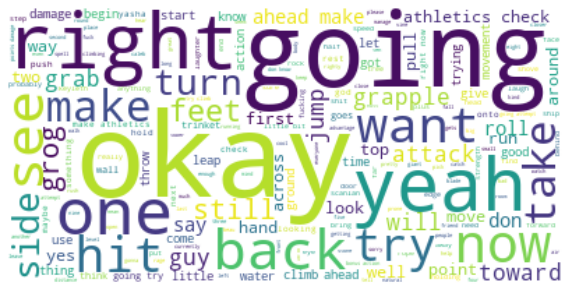

In [253]:
print_wordcloud('Athletics')

In [254]:
BOW('Athletics')

['ability', 'able', 'about', 'above', 'absence', 'absolute', 'absolutely', 'accounts', 'accoutrements', 'accrued', 'achieve', 'achieves', 'acid', 'acrobatics', 'across', 'act', 'acting', 'action', 'actions', 'actual', 'actually', 'add', 'added', 'adding', 'additional', 'adjacent', 'adjust', 'adorable', 'advance', 'advantage', 'adventurer', 'adventurers', 'adventuring', 'affixed', 'aflame', 'afloat', 'after', 'again', 'against', 'ages', 'agile', 'ago', 'agreed', 'ahead', 'ahhh', 'aid', 'aide', 'aim', 'aiming', 'air', 'alcove', 'ale', 'algae', 'alive', 'all', 'allies', 'allow', 'allura', 'almost', 'along', 'alongside', 'alphabetical', 'already', 'also', 'always', 'amazing', 'amdir', 'ammunition', 'amongst', 'amount', 'anchor', 'and', 'anger', 'angle', 'angrily', 'angry', 'anime', 'ankle', 'ankles', 'announce', 'annoyance', 'another', 'any', 'anybody', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apparently', 'appear', 'appears', 'appreciate', 'apprehensive', 'approach', 'appropr

Animal Handling


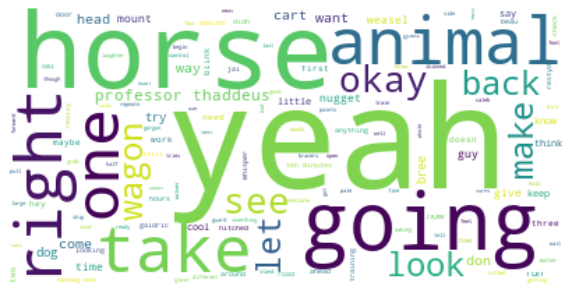

In [255]:
print_wordcloud('Animal Handling')

In [256]:
BOW('Animal Handling')

['able', 'about', 'ack', 'acrobatics', 'across', 'add', 'advantage', 'aeric', 'after', 'again', 'ahead', 'all', 'alley', 'already', 'also', 'always', 'amazing', 'and', 'animal', 'animals', 'animation', 'another', 'anything', 'appear', 'apples', 'arcane', 'are', 'around', 'arrive', 'attempt', 'awesome', 'aye', 'back', 'bad', 'balloon', 'bandit', 'based', 'battle', 'beach', 'beast', 'beau', 'because', 'been', 'beetle', 'beetles', 'before', 'begin', 'begins', 'behind', 'being', 'bek', 'bereft', 'bet', 'better', 'betting', 'beyond', 'biggest', 'bipedal', 'bird', 'birds', 'bit', 'bite', 'bits', 'blade', 'blindfolded', 'blink', 'blood', 'bodies', 'bollocks', 'bond', 'both', 'boulders', 'bracers', 'breath', 'bree', 'brief', 'briefly', 'brighton', 'bringing', 'business', 'but', 'caduceus', 'caleb', 'call', 'calm', 'campsite', 'can', 'carefully', 'cart', 'cast', 'catch', 'caught', 'center', 'chamber', 'changes', 'check', 'cheek', 'cheese', 'chest', 'chirps', 'city', 'climb', 'clomp', 'close', '

Insight


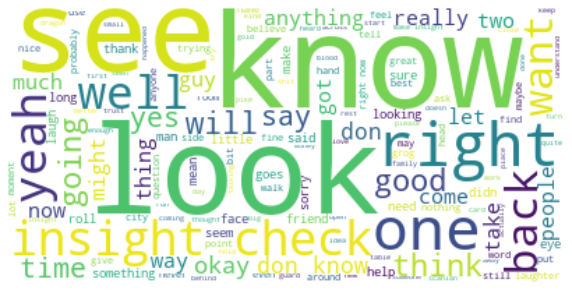

In [257]:
print_wordcloud('Insight')

In [258]:
BOW('Insight')

['aah', 'abdomen', 'ability', 'able', 'aboard', 'abode', 'about', 'above', 'absentee', 'absolute', 'absolve', 'absolved', 'abundant', 'accent', 'acceptable', 'accepting', 'access', 'accidentally', 'accounted', 'accusations', 'accuse', 'accusing', 'achieved', 'achieves', 'acid', 'acolytes', 'acquire', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activity', 'actual', 'actually', 'add', 'added', 'addicted', 'address', 'addresses', 'admitted', 'adrenaline', 'adults', 'advance', 'advantage', 'adventure', 'adventurer', 'adverse', 'advice', 'advise', 'affected', 'affecting', 'afford', 'affordable', 'afoot', 'afraid', 'after', 'afternoon', 'again', 'against', 'agent', 'ago', 'agony', 'agree', 'agreed', 'agrees', 'ahead', 'ails', 'air', 'alarmed', 'albeit', 'alcohol', 'ale', 'alibi', 'alice', 'aligned', 'alignment', 'alike', 'alive', 'all', 'allegiance', 'allegiances', 'alleviate', 'alleyway', 'alliances', 'allies', 'allow', 'allowed', 'allows', 'allura', 'allurements', 'allusions'

Medicine


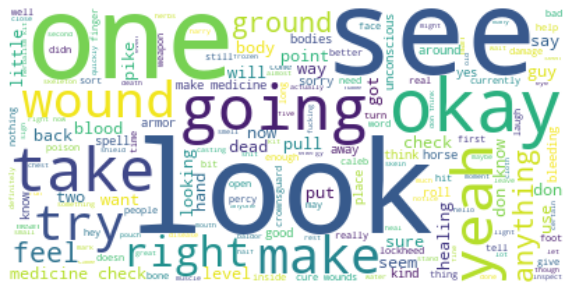

In [259]:
print_wordcloud('Medicine')

In [260]:
BOW('Medicine')

['ability', 'about', 'abs', 'accidentally', 'accidently', 'across', 'action', 'actually', 'administer', 'administering', 'administers', 'advantage', 'after', 'again', 'against', 'ahead', 'aid', 'ailment', 'alas', 'algar', 'alive', 'all', 'allura', 'almost', 'alone', 'along', 'aloud', 'also', 'although', 'always', 'amount', 'ancestors', 'and', 'angry', 'animal', 'animals', 'annoyed', 'another', 'antiqued', 'antitoxin', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apologize', 'appear', 'appendages', 'apples', 'apply', 'approach', 'appropriate', 'arcane', 'are', 'area', 'aren', 'arguments', 'arm', 'armor', 'arms', 'army', 'around', 'arrow', 'ascertain', 'ash', 'ashley', 'asks', 'asleep', 'aspects', 'assist', 'assisting', 'assume', 'ate', 'attached', 'attack', 'attempt', 'attention', 'average', 'away', 'axe', 'aye', 'baby', 'back', 'backwards', 'bad', 'baldor', 'bandage', 'bandages', 'bar', 'barely', 'bark', 'barrel', 'barrels', 'bart', 'base', 'based', 'baseme

Perception


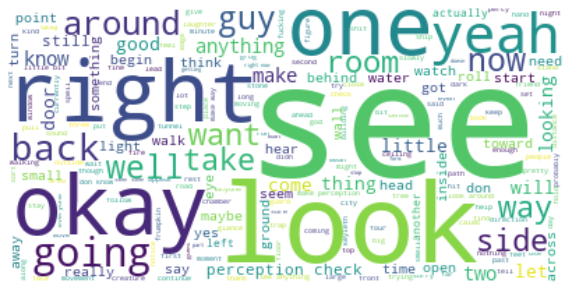

In [261]:
print_wordcloud('Perception')

In [262]:
BOW('Perception')

['aasimar', 'aback', 'abadar', 'abandoned', 'abe', 'abilities', 'ability', 'able', 'aboard', 'abode', 'about', 'above', 'abrasive', 'abrupt', 'abruptly', 'absolutely', 'absolved', 'abusive', 'academy', 'accent', 'accept', 'accepted', 'access', 'accidentally', 'accidently', 'accidents', 'accompany', 'accuracy', 'accurate', 'accustomed', 'ace', 'aches', 'acid', 'ack', 'acknowledge', 'acknowledges', 'acolytes', 'acquaintances', 'acrid', 'acrobatics', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actress', 'actual', 'actually', 'adamant', 'adapt', 'add', 'added', 'addict', 'addition', 'additional', 'address', 'adds', 'adelaine', 'adjacent', 'adjust', 'admire', 'admires', 'admit', 'adopting', 'adorn', 'adorned', 'adorning', 'adorns', 'adrenaline', 'advance', 'advantage', 'advantageous', 'advantages', 'adventure', 'adventurefury', 'adventurers', 'adventures', 'adversaries', 'advised', 'aerial', 'aeric', 'aerwin', 'affect', 'affected',

Survival


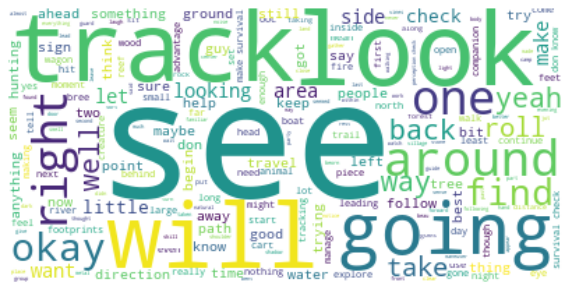

In [263]:
print_wordcloud('Survival')

In [264]:
BOW('Survival')

['abandoned', 'abhorrent', 'abilities', 'ability', 'able', 'about', 'absence', 'accepted', 'accommodate', 'acid', 'across', 'act', 'action', 'actions', 'actively', 'activities', 'actual', 'actually', 'acute', 'add', 'added', 'adjacent', 'admit', 'advantage', 'advantages', 'advice', 'after', 'again', 'against', 'age', 'agree', 'ahead', 'aids', 'aim', 'aimlessly', 'air', 'alarm', 'alert', 'all', 'allegedly', 'alley', 'alleyway', 'allies', 'allows', 'allura', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amdir', 'among', 'amount', 'and', 'anduin', 'anger', 'animal', 'animals', 'ank', 'another', 'any', 'anybody', 'anyone', 'anything', 'anyway', 'anywhere', 'apologies', 'appear', 'appears', 'apply', 'appreciation', 'approach', 'approaches', 'approaching', 'arcane', 'arcanum', 'archer', 'architecture', 'arcing', 'are', 'area', 'areas', 'arguing', 'armor', 'armors', 'arms', 'around', 'arrested', 'arrows', 'art', 'ash', 'ashy', 'ask', 'asked', 'asking', 'asle

#TODO


1.   Fazer bag of words para cada Skill/wordcloud (antes de diminuir o número de linhas) **FEITO**
2.   Printar a matriz de confusão: heatmap do previsto x realizado **FEITO**
3.   Usar o steamming do Spacy, basicamente usar o radical das palavras, retirando plurais e conjugações.
1.   Treinar o classificador adicionando os textos da planilha SKILL DB / Testar a acurácia com eles **FEITO** 
1.   Reduzir o número de linhas usados como backward_text para verificar se melhora as palavras
4.   Usar o Spacy para filtrar apenas verbos e substantivos
5.   Com o bag of words tentar diferentes percentuais acumulados para construir as features com as palavras mais comuns para cada skill. Faz a limpeza do ruído e mantem apenas o sinal.

TO DOs
Lista de atividades pendentes para refinar o modelo e o pipeline, sem uma ordem específica:

Abrigar o código no git hub e abrir esses pontos de melhoria como issues que vamos baixando utilizando pull requests

Testar outros tipos de modelo (decision tree, random forest e NN - Neural Networks costumam ter um bom desempenho neste tipo de problema)

Ajustar a chamada da predição para trabalhar com a string com os mesmos tratamentos utilizados no treino (deve melhorar a eficiência) **criar uma função para isso**

Aumentar a quantidade de dados para treino

Separar o pipeline em scrapping (por fonte de dados), data prep (por fonte de dados), enrichment (combinação das fontes de dados), treino do modelo, escoragem e validação do modelo

Verificar uma forma mais elegante de passar / criar stopwords em grande volume no Spacy

Fazer análise de wordcloud utilizando os dados de treinamento

Fazer análise de bag of words utilizando os dados de treinamento

Fazer análise de bag of words com percentil acumulado de ocorrências (separar ruído de sinal) nas palavras que irão para o treinamento, colocar um ponto de corte

Testar modelo com menos linhas de texto do transcript, analisar se melhora o modelo.

Testar pegar apenas verbos e substantivos (POS - Part of Speech) com o Spacy, analisar se o modelo melhora

Testar lemmatização utilizando o Spacy, analisar se o modelo melhora.

Testar iterar pela parse tree do Spacy, testar se os ngramas (combinação de palavras que aparecem juntas) melhoram o modelo.

Extração de NER (nomes de players) utilizando o Spacy

ref. https://spacy.io/usage/linguistic-features

20/01
adicionar uma coluna com o texto feito o pos e outra coluna com o pos e o stemming